In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('../input/us-heart-patients/US_Heart_Patients.csv')
df=df.sample(frac=1, random_state=3)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [8]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

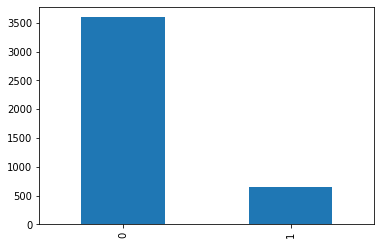

In [9]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

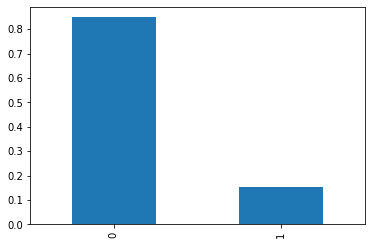

In [10]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [13]:
df = df.fillna(method='ffill')

In [14]:
y=df['TenYearCHD']
X=df.drop('TenYearCHD', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968, 15)
(1272, 15)
(2968,)
(1272,)


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [17]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(fit_intercept= True, solver= 'liblinear')

lr.fit(X_train, y_train)
y_train_pred= lr.predict(X_train)
y_train_prob= lr.predict_proba(X_train)[:,1]

print('Confusion Matrix: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy -Train: ', accuracy_score(y_train, y_train_pred))
print('AUC-Train:',roc_auc_score(y_train, y_train_prob))

Confusion Matrix:  
 [[2520   13]
 [ 401   34]]
Overall Accuracy -Train:  0.860512129380054
AUC-Train: 0.7310036257039266


In [18]:
lr.fit(X_train, y_train)
y_test_pred= lr.predict(X_test)
y_test_prob= lr.predict_proba(X_test)[:,1]

print('Confusion Matrix: -Test', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy -Test: ', accuracy_score(y_test, y_test_pred))
print('AUC-Test:',roc_auc_score(y_test, y_test_prob))

Confusion Matrix: -Test 
 [[1060    3]
 [ 200    9]]
Overall Accuracy -Test:  0.8404088050314465
AUC-Test: 0.6991857476582931


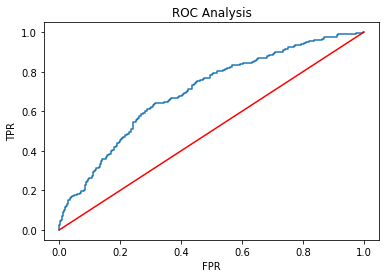

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Analysis')
plt.show()